# Bike Sharing

# 1. Import Libraires and Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

# 2. Loding and Viewing Data Set
* datetime : 시간
* season : 계절
* holiday : 공휴일
* workingday : 일하는날
* weather : 날씨(맑은날이 1, 가장 안좋은 날이 4)
* temp : 온도
* atemp : 체감 온도
* humidity : 습도
* windspeed : 풍속
* count : 수요량
* casual : 비회원
* registered : 회원

In [2]:
df_train = pd.read_csv('./train.csv', parse_dates=['datetime'])
df_test = pd.read_csv('./test.csv', parse_dates=['datetime'])

In [3]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 3. NAN

In [4]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   

In [5]:
df_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
df_test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [7]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
df_train.shape, df_test.shape

((10886, 12), (6493, 9))

### 날짜

In [9]:
from datetime import datetime

df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['day'] = df_train['datetime'].dt.day
df_train['hour'] = df_train['datetime'].dt.hour
df_train['dayofweek'] = df_train['datetime'].dt.dayofweek

df_test['year'] = df_test['datetime'].dt.year
df_test['month'] = df_test['datetime'].dt.month
df_test['day'] = df_test['datetime'].dt.day
df_test['hour'] = df_test['datetime'].dt.hour
df_test['dayofweek'] = df_test['datetime'].dt.dayofweek
# 년, 월, 일, 시간으로 쪼갠다.
# 비교 해보고
df_train.shape, df_test.shape


((10886, 17), (6493, 14))

In [10]:
df_train[['season','month']].sample(5)

,season,month
6434,1,3
8286,3,7
10736,4,12
8271,3,7
1761,2,4


In [11]:
df_train.loc[(df_train['month'] == 3) | (df_train['month'] == 4) | (df_train['month'] == 5), 'season'] = 1
df_train.loc[(df_train['month'] == 6)|(df_train['month'] == 7)|(df_train['month'] == 8), 'season'] = 2
df_train.loc[(df_train['month'] == 9)|(df_train['month'] == 10)|(df_train['month'] == 11), 'season'] = 3
df_train.loc[(df_train['month'] == 12)|(df_train['month'] == 1)|(df_train['month'] == 2), 'season'] = 4

df_test.loc[(df_train['month'] == 3)|(df_test['month'] == 4)| (df_test['month'] == 5), 'season'] = 1
df_test.loc[(df_train['month'] == 6)|(df_test['month'] == 7)| (df_test['month'] == 8), 'season'] = 2
df_test.loc[(df_train['month'] == 9)|(df_test['month'] == 10)|(df_test['month'] == 11), 'season'] = 3
df_test.loc[(df_train['month'] == 12)|(df_test['month'] == 1)|(df_test['month'] == 2), 'season'] = 4


In [12]:
df_train[['season', 'month']].sample(5)

,season,month
4793,3,11
2845,2,7
7339,1,5
4775,3,11
1696,1,4


In [13]:
# 연속형 featrue와 범주형 featrue
# 번주형 featrue의 type을 category로 변경 해 준다.
categorical_feature_names = categorical_feature_names = ["season","holiday","workingday","weather","dayofweek","month","year","hour",'day']

In [14]:
for var in categorical_feature_names:
    df_train[var] = df_train[var].astype('category')
    df_test[var] = df_test[var].astype('category')

In [15]:
feature_names = ['season', 'weather','temp','atemp','humidity','year','hour','dayofweek','holiday','workingday']
feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

# 4. Plotting and Visualizing Data

#### 막대그래프 함수

In [16]:
# 막대 그래프
def barplt(column):
    sns.barplot(x=column, y='count', data=df_train)
    plt.title(column)
    plt.show()

#### point 그래프 함수

In [17]:
def pointplt(feature):
    plt.figure(figsize=(10,5))
    sns.pointplot(data=df_train, x='hour', y='count',hue=feature)

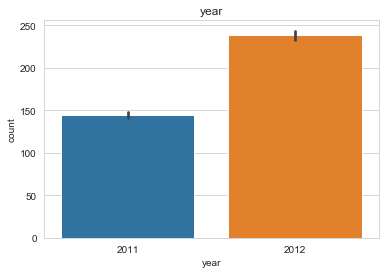

In [18]:
barplt('year')

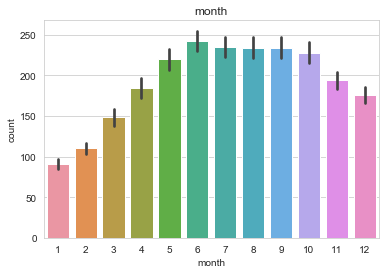

In [19]:
barplt('month')

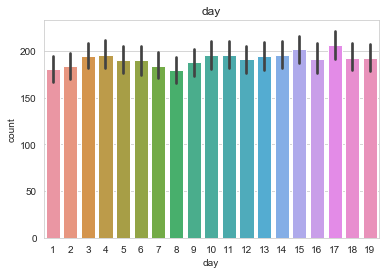

In [20]:
barplt('day')
# 19일 이후는 test에 있다.
# 앞으로 예측할 것들

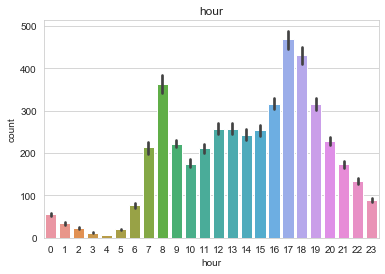

In [21]:
barplt('hour')
# 출근시간 8시가 많이빌린다.
# 퇴금시간17, 18시 많이 빌린다.
# 새벽 12~6까진 빌리는 사람이 적다. 

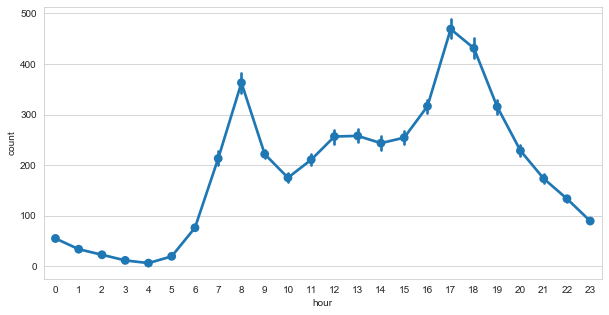

In [22]:
# 시간별 수요
pointplt(None)

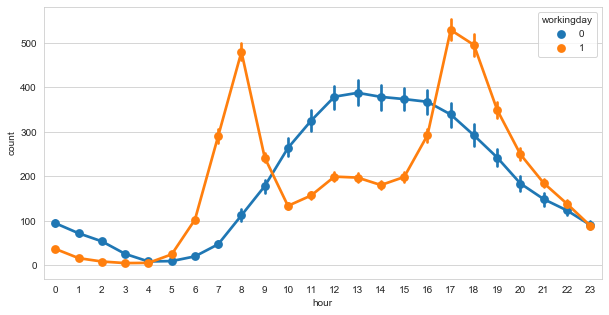

In [23]:
# 근무일때는 출퇴근 시간에 짐중되어있다.
# 출근이 아닐 때는 낮 시간에 높다.
pointplt('workingday')

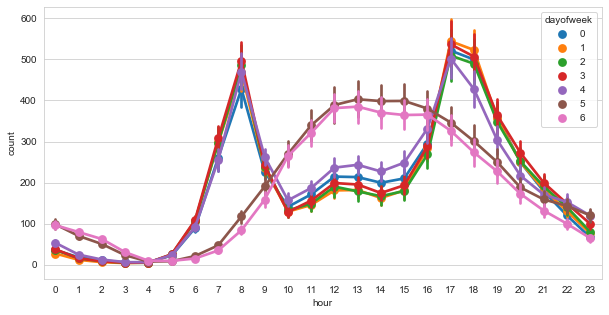

In [24]:
# 평일은 출퇴근
# 주말은 낮시간에
pointplt('dayofweek')
plt.savefig('image/hour of dayofweek')

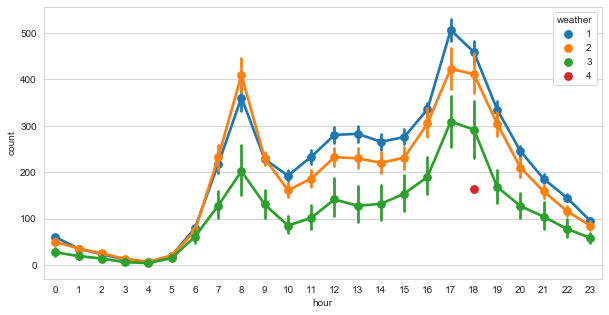

In [25]:
# 날이 좋은날이 많이 빌린다.
# 날이 좋지안은 날을 빌리지 않는다.

pointplt('weather')
plt.savefig('image/hour of weather')

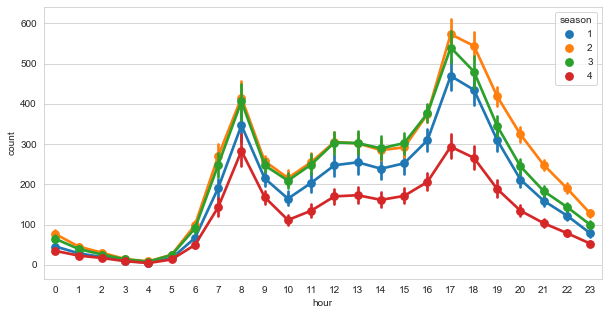

In [26]:
# 봄에 빌리는게 적다.
# 여름, 가을, 겨울 비슷하지만 겨울이 조금 준다.
pointplt('season')
plt.savefig('image/hour of season')

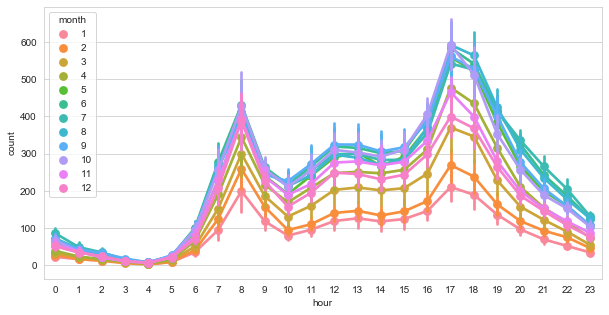

In [27]:
pointplt('month')
plt.savefig('image/hour of month')

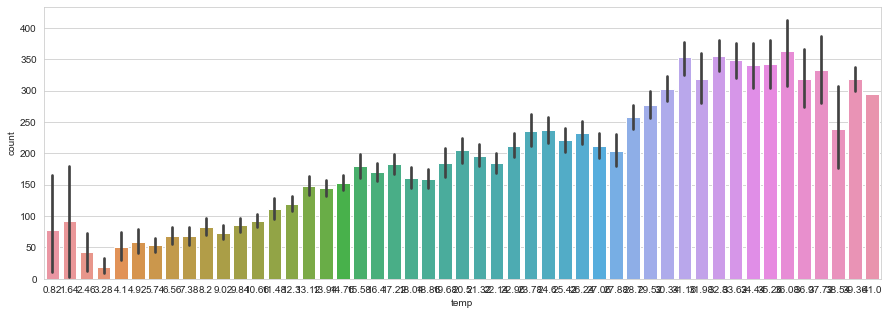

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x='temp',y='count',data=df_train)

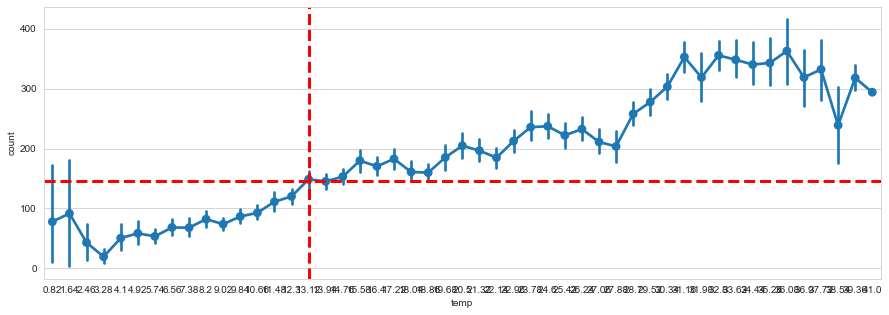

In [29]:
plt.figure(figsize=(15,5))
sns.pointplot(x='temp', y='count', data=df_train)
plt.axvline(x=15, color='r', linestyle='--', linewidth=3)
plt.axhline(y=145, color='r', linestyle='--', linewidth=3)

In [30]:
len(df_train[df_train.temp < 20]['temp'])


5308

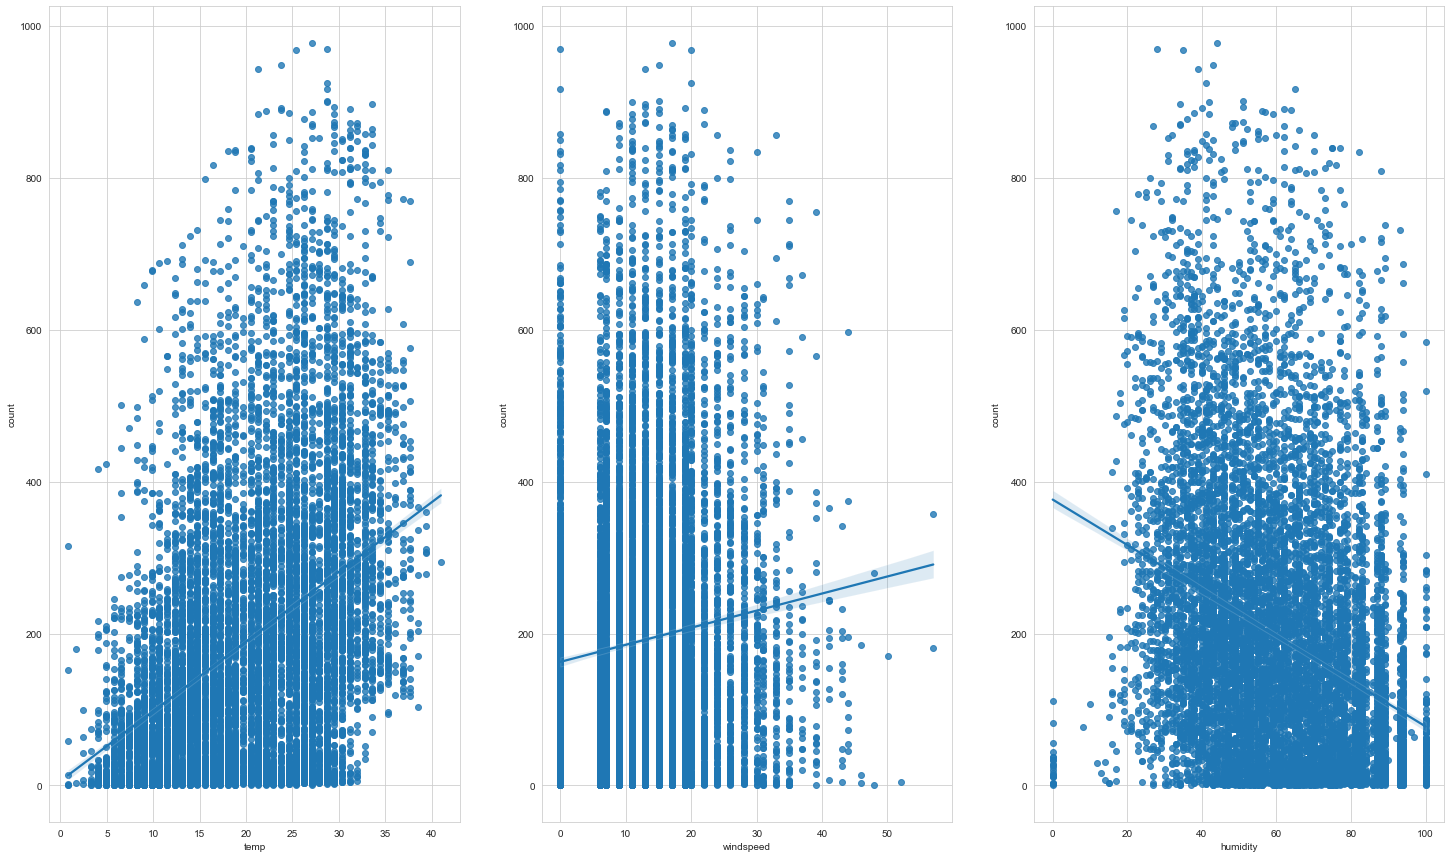

In [31]:
plt.figure(figsize=(25,15))
plt.subplot(131)
temp_scatter_plot = pd.concat([df_train['count'],df_train['temp']],axis = 1)
sns.regplot(x='temp',y = 'count',data = temp_scatter_plot,scatter= True, fit_reg=True)

plt.subplot(132)
windspeed_scatter_plot = pd.concat([df_train['count'], df_train['windspeed']], axis=1)
sns.regplot(x='windspeed', y='count', data=windspeed_scatter_plot, scatter=True, fit_reg=True)

plt.subplot(133)
humidity_scatter_plot = pd.concat([df_train['count'], df_train['humidity']], axis=1)
sns.regplot(x='humidity', y='count', data=humidity_scatter_plot, scatter=True, fit_reg=True)

plt.show()

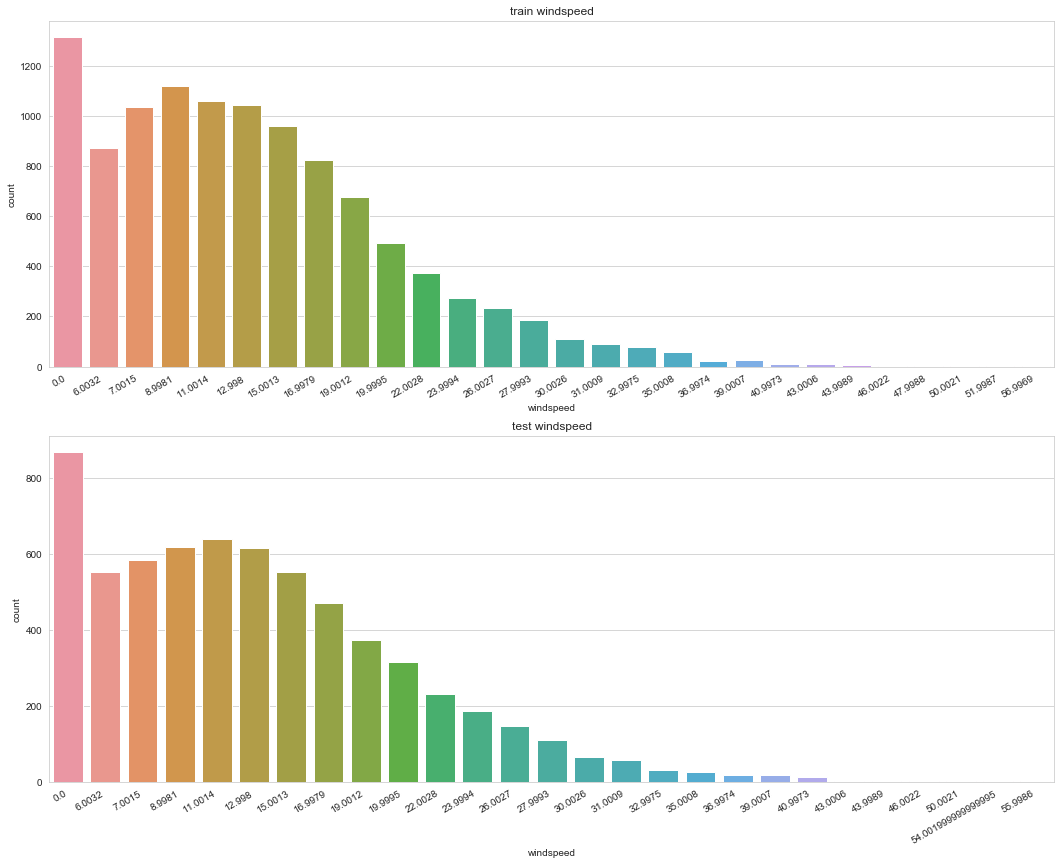

In [32]:
fig, axes = plt.subplots(nrows = 2, figsize=(18,14))

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='count', title = 'train windspeed')
sns.countplot(data=df_train, x='windspeed', ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='count',title='test windspeed')
sns.countplot(data=df_test, x='windspeed', ax=axes[1])

# 풍속에 대한 자세한 시각화
# 0에대한 값이 매우 많다.
# feature engineering에서 고쳐주도록한다.

# 5. Feature Engineering

In [33]:
def concatenate_year_month(datetime):
    return '{0}-{1}'.format(datetime.year, datetime.month)

df_train['year_month'] = df_train['datetime'].apply(concatenate_year_month)
df_test['year_month'] = df_test['datetime'].apply(concatenate_year_month)

print(df_train.shape)
df_train[['datetime', 'year_month']].sample(5)
# 연도별 데이터의 대여 변화를 좀더 자세히 보기 위해 year, month 데이터를 붙여줌

(10886, 18)


,datetime,year_month
6242,2012-02-16 08:00:00,2012-2
4091,2011-10-02 12:00:00,2011-10
2962,2011-07-12 08:00:00,2011-7
6083,2012-02-09 17:00:00,2012-2
6031,2012-02-07 13:00:00,2012-2


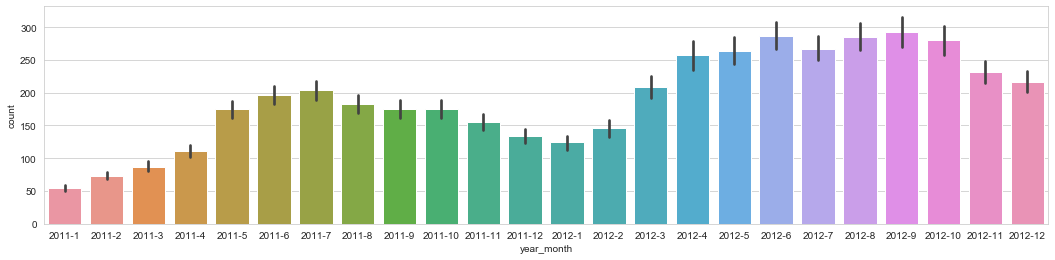

In [34]:
fig, ax = plt.subplots(figsize=(18,4))

sns.barplot(data=df_train, y='count', x='year_month')

# 2011년에 지해 2012년의 대여량이 높아졌던것을 확인했는데, 두 년도를 월별로 시각화하여 좀 더 연속적으로 봄
# 전체적으로 대여량이 증가하는추세

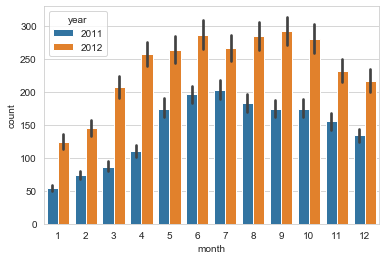

In [35]:
sns.barplot(x='month', y='count', hue='year', data=df_train)
# 2011년도의 월별 흐름이랑 2012년도의 월별 흐름이 비슷하다.

In [30]:
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 *IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers

Outliers_to_drop = detect_outliers(df_train, 2, ['temp', 'atemp','casual', 'registered', 'humidity','windspeed','count'])

# train 데이터의 이상치를 탐색
# IQR(튜키의 방법)을 이용한 함수를 지겅하여 이상치 탐색을 수행

In [31]:
len(df_train.loc[Outliers_to_drop])

40

In [32]:
df_train = df_train.drop(Outliers_to_drop,axis=0).reset_index(drop=True)
df_train.shape

(10846, 18)

In [270]:
len(df_train[df_train['windspeed'] == 0])

1313

In [33]:
df_train_num = df_train[['count', 'temp','atemp','casual','registered','humidity','windspeed']]

for col in df_train_num:
    print('{:15}'.format(col),'Skewness: {:05.2f}'.format(df_train[col].skew()),'\tKurtosis: {:06.2f}'.format(df_train[col].kurt()))

    
# 첨도 왜도 확인

count           Skewness: 01.21 	Kurtosis: 001.20
temp            Skewness: 00.01 	Kurtosis: -00.91
atemp           Skewness: -0.10 	Kurtosis: -00.85
casual          Skewness: 02.52 	Kurtosis: 007.74
registered      Skewness: 01.51 	Kurtosis: 002.61
humidity        Skewness: -0.09 	Kurtosis: -00.76
windspeed       Skewness: 00.58 	Kurtosis: 000.63


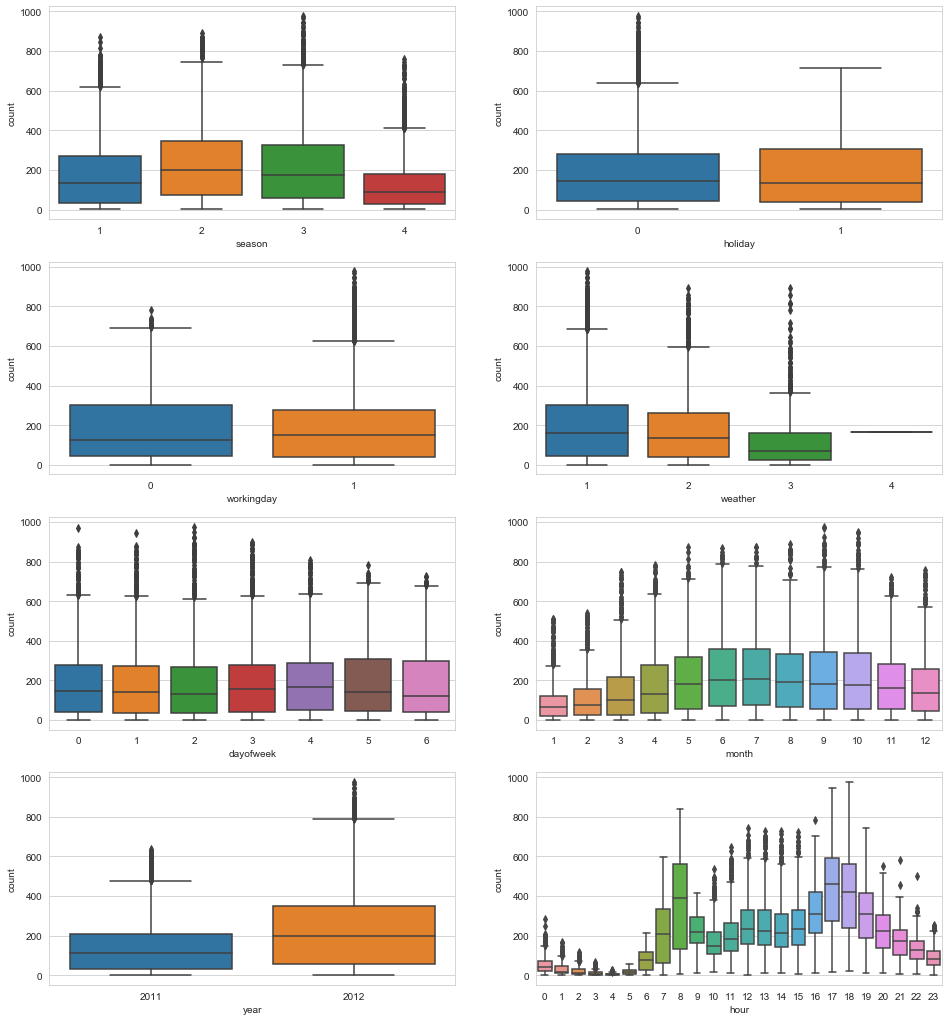

In [34]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,18))
sns.boxplot(data=df_train, y='count', x='season', orient='v',ax=axes[0][0])
sns.boxplot(data=df_train, y='count', x='holiday',orient='v',ax=axes[0][1])
sns.boxplot(data=df_train, y='count', x='workingday',orient='v',ax=axes[1][0])
sns.boxplot(data=df_train, y='count', x='weather',orient='v',ax=axes[1][1])
sns.boxplot(data=df_train, y='count', x='dayofweek',orient='v',ax=axes[2][0])
sns.boxplot(data=df_train, y='count', x='month',orient='v',ax=axes[2][1])
sns.boxplot(data=df_train, y='count', x='year',orient='v',ax=axes[3][0])
sns.boxplot(data=df_train, y='count', x='hour',orient='v',ax=axes[3][1])


> 왜도 : 왜도는 분포의 비대칭도를 나타내는 통계량이다. 정규분포, T분포와 같이 대칭인 분포의 경우 왜도가 0이다. 카이제곱분포와 같이 오른쪽으로 긴 꼬리를 가진 경우(skewed to the right) 왜도는 양수이다. <br><br>
첨도 : 첨도는 분포의 꼬리부분의 길이와 중앙부분의 뾰족함에 대한 정보를 제공하는 통계량이다. 아주 well-defined된 통계량이 아니기 때문에 여전히 해석에 논란의 여지가 있다. 첨도가 0보다 크면 정규분포보다 긴 꼬리를 갖고, 분포가 보다 중앙부분에 덜 집중되게 되므로 중앙부분이 뾰족한 모양을 가지게 된다.

Skewness : 1.2420662117180776
Kurtosis : 1.3000929518398334


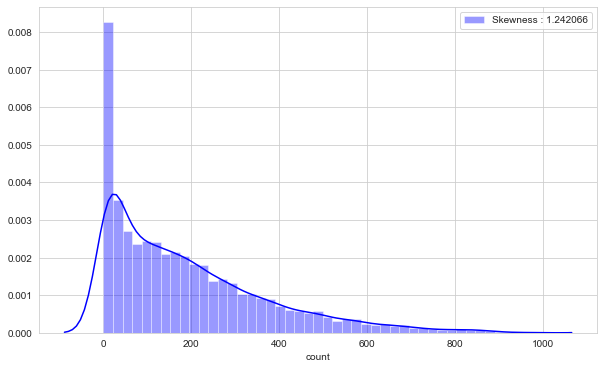

In [36]:
f, ax = plt.subplots(1,1,figsize=(10,6))
g = sns.distplot(df_train['count'], color='b', label='Skewness : {:2f}'.format(df_train['count'].skew()), ax=ax)
g = g.legend(loc='best')

print('Skewness : {}'.format(df_train['count'].skew()))
print('Kurtosis : {}'.format(df_train['count'].kurt()))

# 첨도와 왜도 확인

Skewness : -0.9712277227866112
Kurtosis : 0.24662183416964112


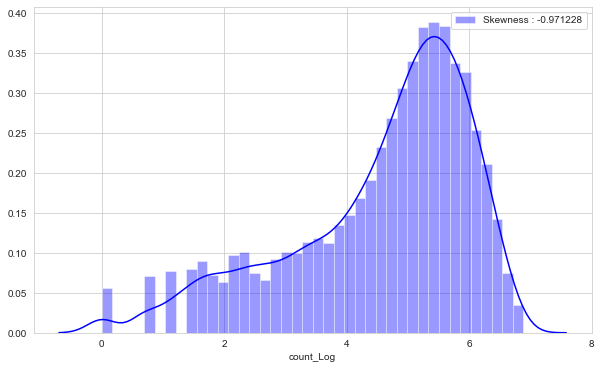

In [37]:
df_train['count_Log'] = df_train['count'].map(lambda i:np.log(i) if i > 0 else 0)

f, ax = plt.subplots(1,1,figsize=(10,6))
g = sns.distplot(df_train['count_Log'], color='b',label='Skewness : {:2f}'.format(df_train['count_Log'].skew()), ax=ax)
g = g.legend(loc='best')

print('Skewness : {}'.format(df_train['count_Log'].skew()))
print('Kurtosis : {}'.format(df_train['count_Log'].kurt()))

# df_train.drop('count', axis=1, inplace=True)
      
# 치우침 해소를 위해 로그를 취한다.

In [38]:
from sklearn.ensemble import RandomForestClassifier
# RandomForest로 값을 예측해보도록 합니다.
def predict_windspeed(data):
    dataWind0 = data.loc[data["windspeed"] == 0]
    dataWindNot0 = data.loc[data["windspeed"] != 0]
    # 풍속 데이터를 0인 값과 아닌 값들로 나눠줍니다.
    wcol = ["season", "weather", "humidity", "day", "temp", "atemp"]
    # 예측에 필요한 변수들을 지정합니다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
    # 풍속이 0이 아닌 값들을 string데이터로 변환합니다.
    rf_wind = RandomForestClassifier()
    rf_wind.fit(dataWindNot0[wcol], dataWindNot0["windspeed"])
    wind0 = rf_wind.predict(X=dataWind0[wcol])
    # 랜덤포레스트를 사용하여 wcol의 변수들로 0인 값들을 학습시키고 예측합니다.
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    # 예측한 값을 넣어줄 데이터프레임을 만듭니다.
    predictWind0["windspeed"] = wind0
    # 예측값들을 넣어줍니다.
    data = predictWindNot0.append(predictWind0)
    # 0이 아닌 데이터들과 예측값들을 합쳐줍니다.
    data["windspeed"] = data["windspeed"].astype("float")
    # 풍속의 데이터들을 다시 float 타입으로 변환합니다.
    data.reset_index(inplace = True)
    data.drop("index", inplace = True, axis = 1)
    
    return data

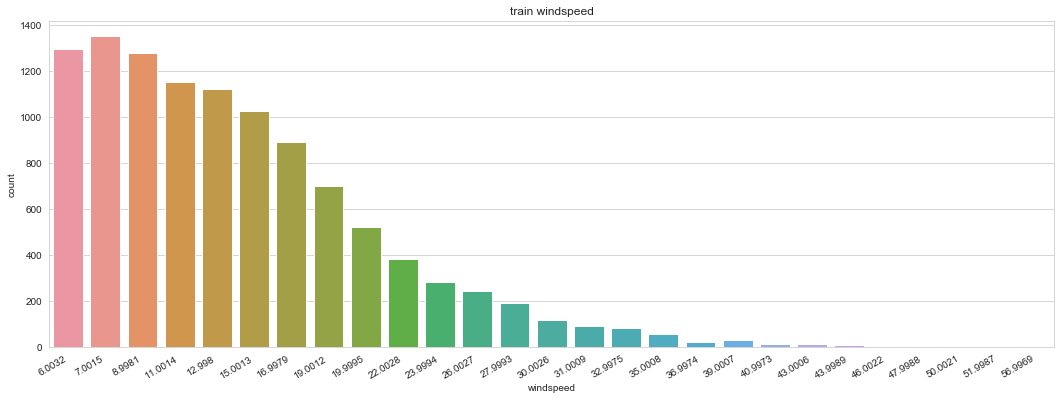

In [40]:
# 0값을 조정한다.
df_train = predict_windspeed(df_train)
# test = predict_windspeed(test)

# widspeed 의 0 값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="train windspeed")
sns.countplot(data=df_train, x="windspeed", ax=ax1)

### 2011, 2012

In [39]:
train = df_train.copy()
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,year_month,count_Log
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,2011-1,2.772589
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,2011-1,3.688879
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5,2011-1,3.465736
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5,2011-1,2.564949
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5,2011-1,0.000000


In [41]:

average_temp1 = []
for i in range(1,13):
    temp = df_train[(df_train.year == 2011) & (df_train['month'] == i)]['temp'].mean()
    average_temp1.append(temp)

average_temp1

[8.633781902552187,
 11.331076233183856,
 14.06318385650224,
 17.77687912087913,
 21.528596491228026,
 28.191096491228063,
 29.967763157894776,
 29.66745614035085,
 25.141236203090514,
 20.903692307692324,
 16.036754385964915,
 12.897017543859619]

In [42]:

average_temp2 = []
for i in range(1,13):
    temp = df_train[(df_train.year == 2012) & (df_train['month'] == i)]['temp'].mean()
    average_temp2.append(temp)

average_temp2

[10.987637969094896,
 12.256747252747239,
 17.66167770419426,
 19.6195982142857,
 23.799955752212398,
 25.887527839643635,
 31.71449339207047,
 29.77567928730512,
 26.366013363028927,
 20.92909090909089,
 14.332879120879113,
 14.765394736842094]

In [43]:
for i in range(1,13):
    train.loc[(train.month == i) & (train.year == 2011), 'avg_temp'] = average_temp1[i-1]
    train.loc[(train.month == i) & (train.year == 2012), 'avg_temp'] = average_temp2[i-1]


In [44]:
train['avg_temp'] = train['avg_temp'].map(lambda x:round(x,2))

In [45]:
df1 = train[(train['year']==2011)]
df2 = train[train['year'] == 2012]

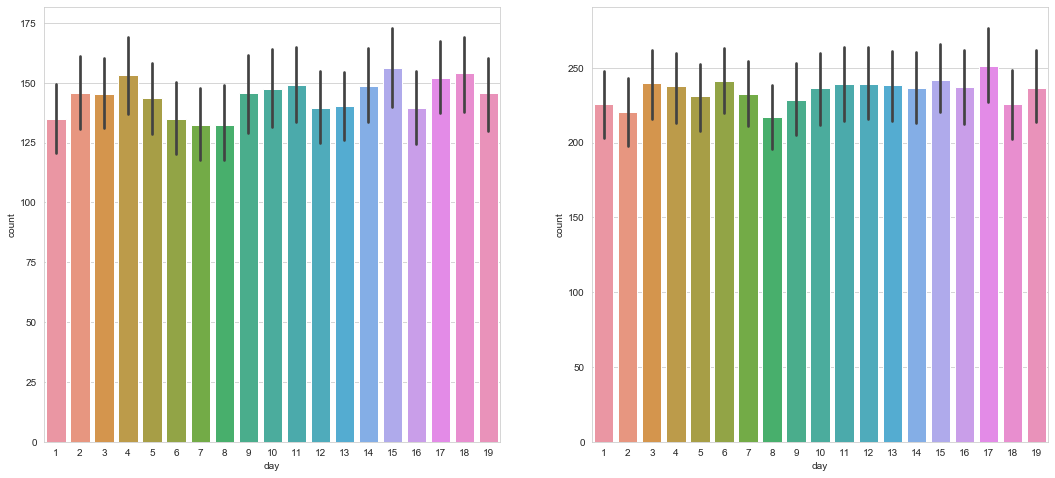

In [46]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.barplot(x='day',y='count', data=df1)
plt.subplot(122)
sns.barplot(x='day',y='count', data=df2)

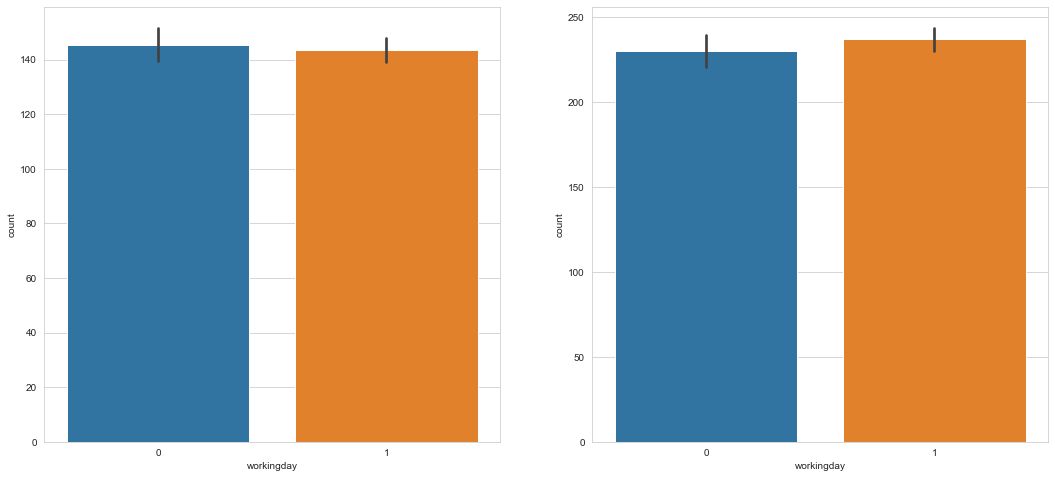

In [47]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.barplot(x='workingday',y='count', data=df1)
plt.subplot(122)
sns.barplot(x='workingday',y='count', data=df2)

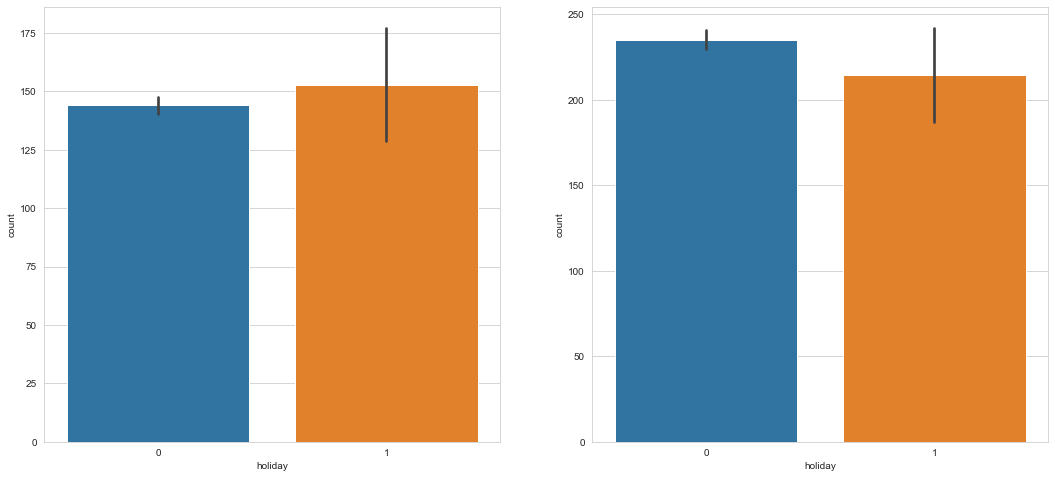

In [48]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.barplot(x='holiday',y='count', data=df1)
plt.subplot(122)
sns.barplot(x='holiday',y='count', data=df2)

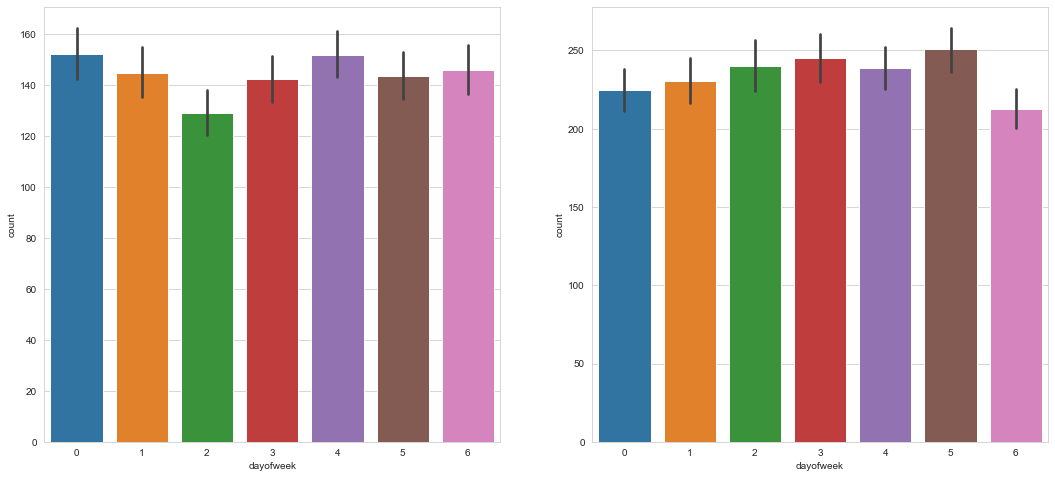

In [49]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.barplot(x='dayofweek',y='count', data=df1)
plt.subplot(122)
sns.barplot(x='dayofweek',y='count', data=df2)

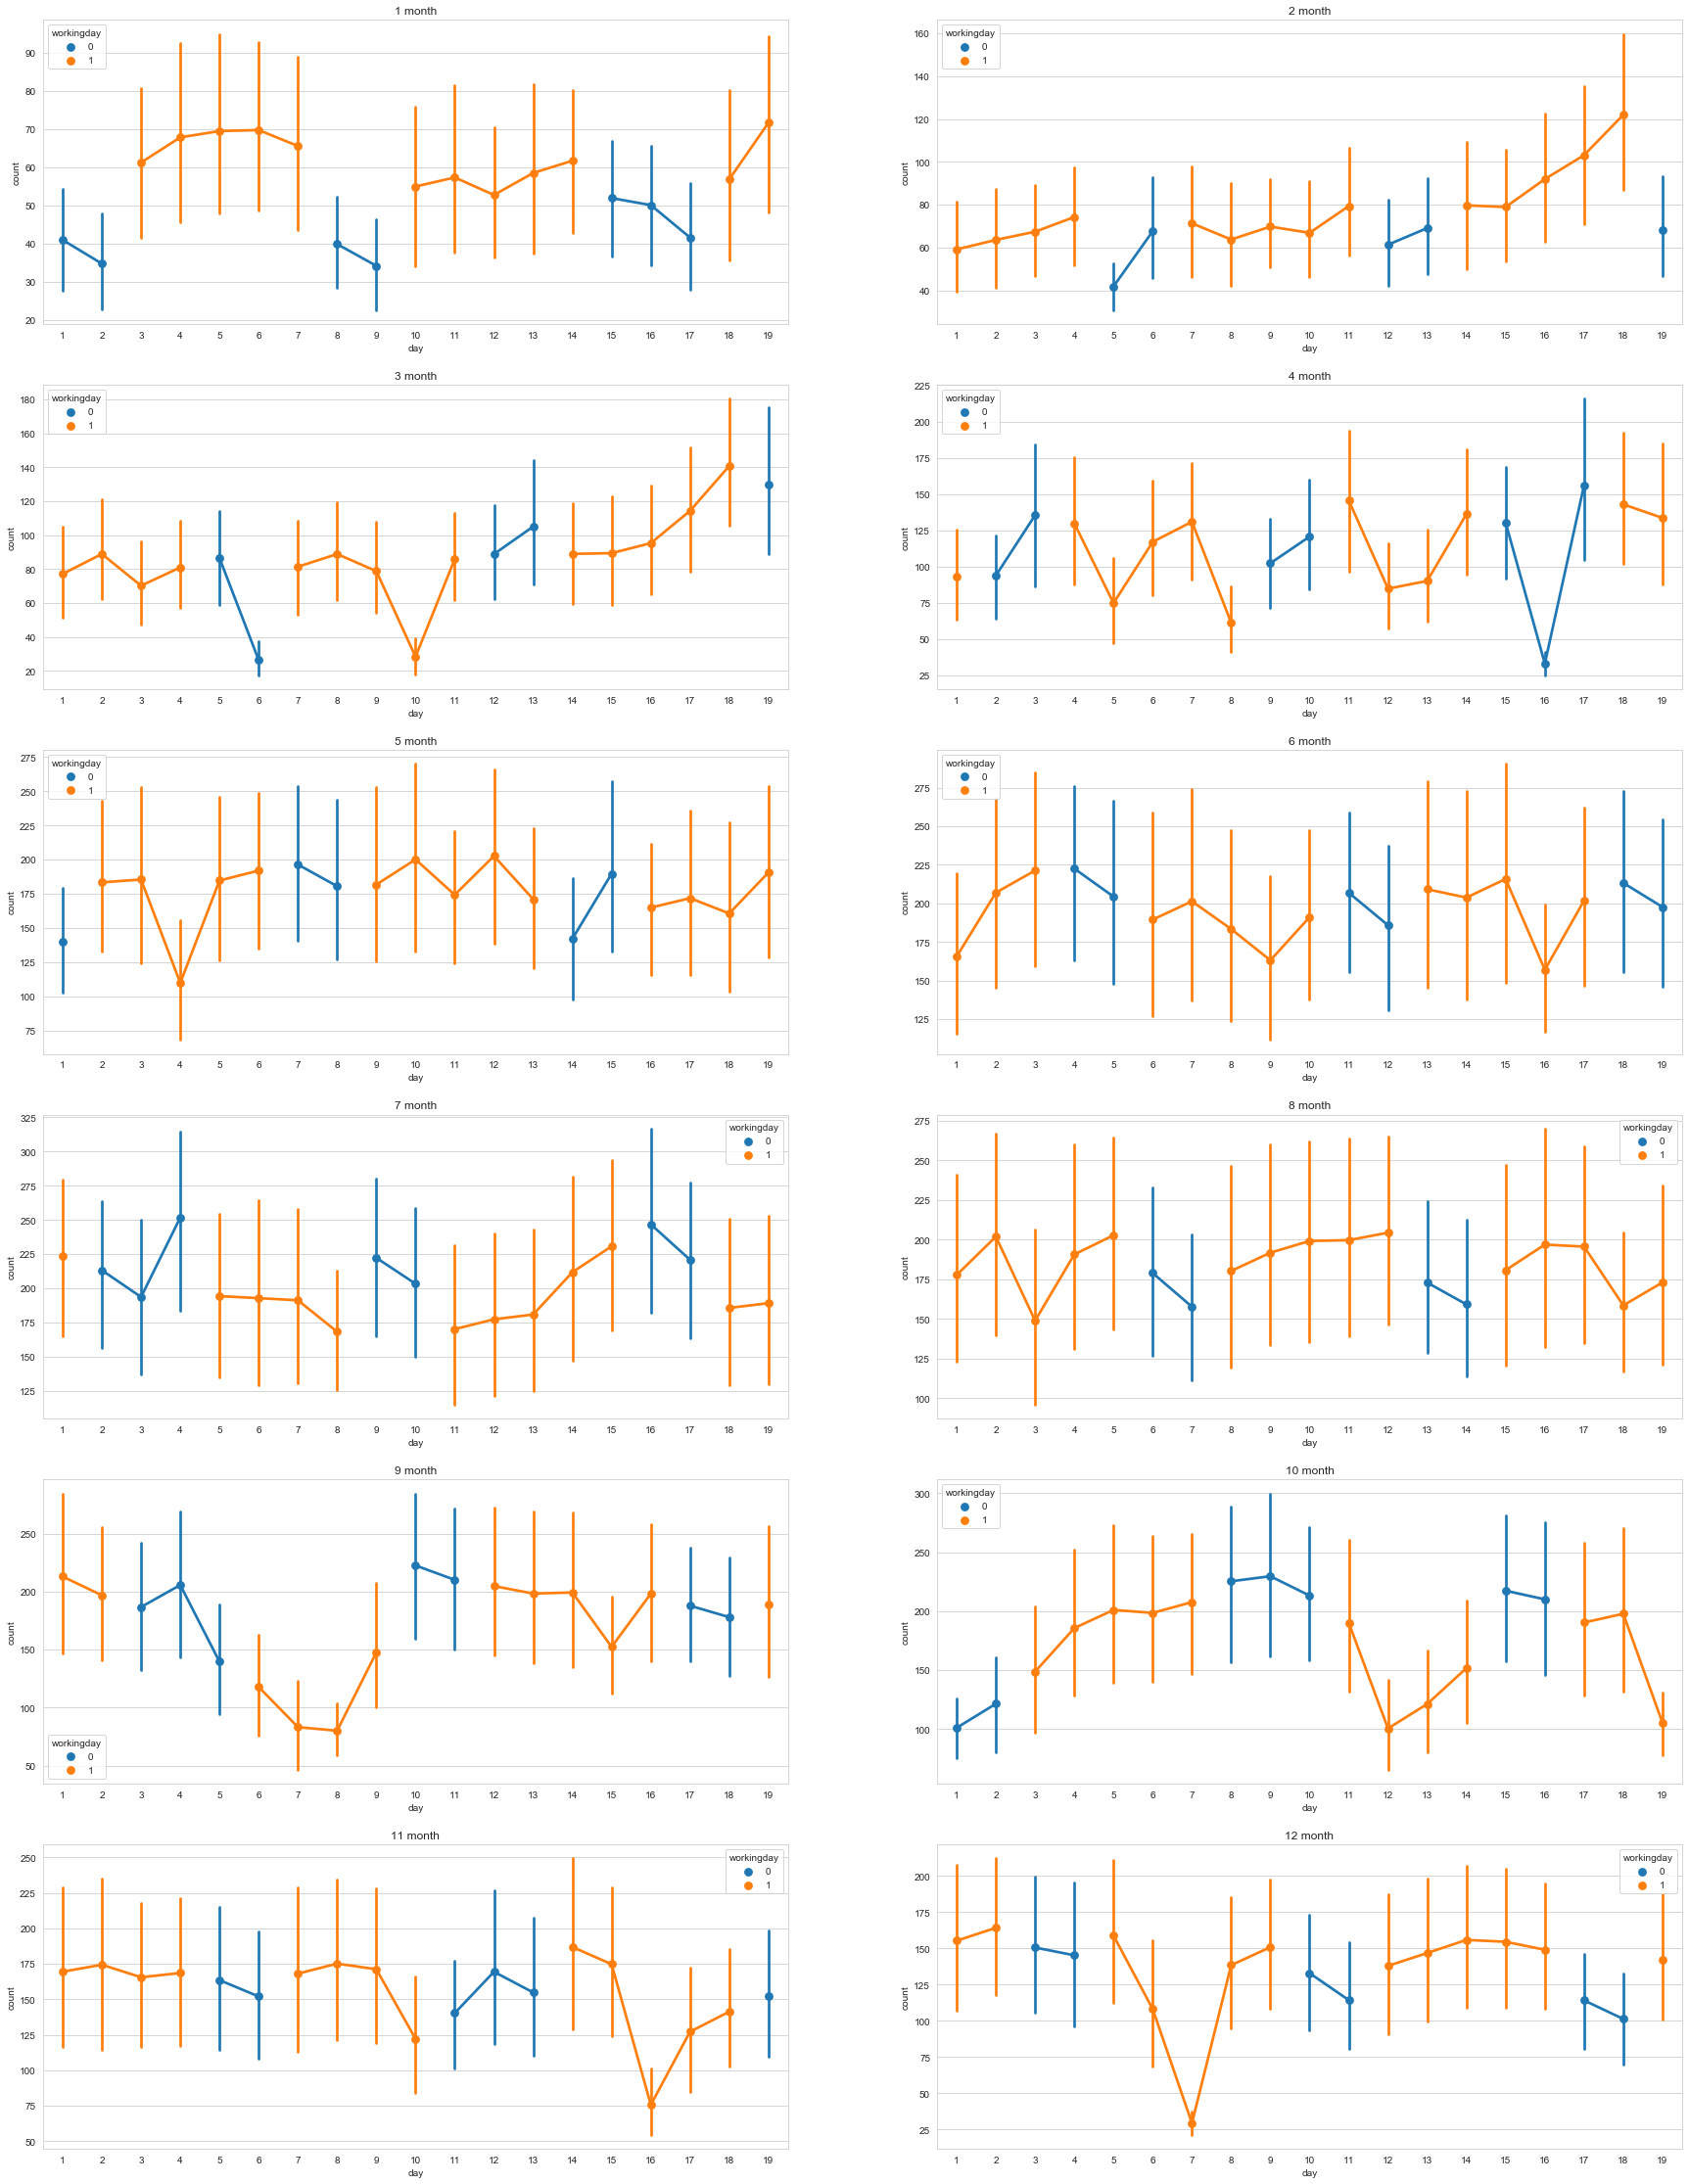

In [50]:
plt.figure(figsize=(30,40))
for i in range(1,13):    
    plt.subplot(6,2,i)
    sns.pointplot(x='day', y='count', hue='workingday', data=df1[df1['month']==i])
    plt.title('{} month'.format(i))

In [ ]:
plt.figure(figsize=(30,40))
for i in range(1,13):    
    plt.subplot(6,2,i)
    sns.pointplot(x='day', y='count', hue='workingday', data=df2[df2['month']==i])
    plt.title('{} month'.format(i))

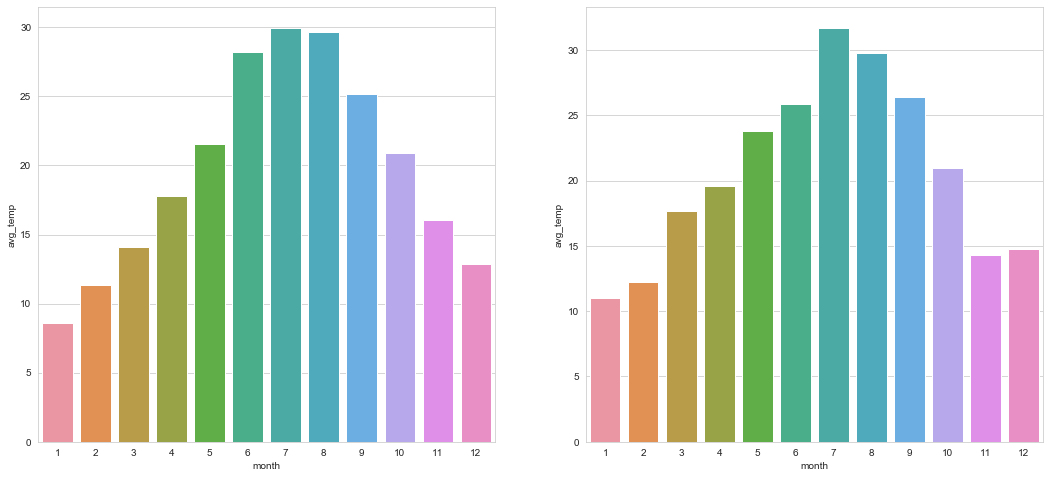

In [51]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.barplot(x='month', y='avg_temp', data=df1)
plt.subplot(122)
sns.barplot(x='month', y='avg_temp', data=df2)

In [52]:
li = []
li2=[]
for i in range(7):
    t= df1[df1['dayofweek'] == i].count()['dayofweek']
    t2 = df2[df2['dayofweek'] == i].count()['dayofweek']
    li.append(t)
    li2.append(t2)
print(li)
print(li2)

print(len(df1))
print(len(df2))
print(list(map(lambda x:x/len(df1), li)))
print(list(map(lambda x:x/len(df2), li2)))

[762, 773, 760, 762, 785, 816, 764]
[785, 760, 783, 784, 734, 764, 814]
5422
5424
[0.14053854666174842, 0.14256731833271855, 0.14016967908520842, 0.14053854666174842, 0.1447805237919587, 0.15049797122832903, 0.14090741423828845]
[0.14472713864306785, 0.140117994100295, 0.144358407079646, 0.14454277286135694, 0.13532448377581122, 0.14085545722713863, 0.15007374631268436]


In [53]:
label_name = 'count'

y_train = df_train[label_name]

print(y_train.shape)
y_train.head()

(10846,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [41]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):

    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
        
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 값이 0일 수도 있어서 로그를 취했을 때 마이너스 무한대가 될 수도 있기 때문에 1을 더해 줌
    # 로그를 씌워주는 것은 정규분포로 만들어주기 위해
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

# 6. Model

In [137]:
feature_names = ['season', 'weather','temp','atemp','humidity','year','hour','dayofweek','holiday','workingday']

In [138]:
x_train = df_train[feature_names]
y_train = df_train[label_name]
x_test = df_test[feature_names]

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# 6-2. Model

In [151]:
feature_names = ['season', 'temp' ,'workingday','hour','month', 'humidity','windspeed']

In [152]:
x_train = df_train[feature_names]
y_train = df_train['count_Log']
x_test = df_test[feature_names]

In [153]:
feature_names

['season', 'temp', 'workingday', 'hour', 'month', 'humidity', 'windspeed']

In [154]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# 6-3. Model

In [197]:
len(df_train.columns)
feature_names = ['season', 'weather','temp','atemp','humidity','year','hour','dayofweek','holiday','workingday']
len(feature_names)

10

In [198]:
x_train = df_train[feature_names]
y_train = df_train['count_Log']
x_test = df_test[feature_names]

In [199]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# 6-4. Model

In [179]:
feature_names = ['season', 'temp' ,'workingday','hour','month', 'humidity','windspeed','weather']

In [180]:
x_train = df_train[feature_names]
y_train = df_train['count_Log']
x_test = df_test[feature_names]

In [181]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# 6-5. Model

In [46]:
feature_names = ['season', 'temp' ,'workingday','hour', 'humidity','windspeed','weather', 'dayofweek', 'holiday']

In [47]:
x_train = df_train[feature_names]
y_train = df_train['count_Log']
x_test = df_test[feature_names]

In [48]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# 6-6. Model

In [59]:
feature_names = ['month', 'temp' ,'workingday','hour', 'humidity','windspeed','weather', 'dayofweek', 'holiday']

In [60]:
x_train = df_train[feature_names]
y_train = df_train['count_Log']
x_test = df_test[feature_names]

In [61]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## Linear Regression Model

In [140]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

# 선형 회귀 모델의 초기화
model_lr = LinearRegression()

# 모델을 학습시킵니다.
y_train_log = np.log1p(Y_train)
model_lr.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

# 예측하고 정확도를 평가한다.
preds = model_lr.predict(X_valid)
lr_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMSLE : {}'.format(lr_score))

RMSLE : 0.993088007390853


In [141]:
preds.shape

(2170,)

In [145]:
Y_valid.shape

(2170,)

In [146]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.000000,0.587083
preds,0.587083,1.000000


## Linear Regression Model 2

In [155]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

# 선형 회귀 모델의 초기화
model_lr = LinearRegression()

# 모델을 학습시킵니다.
y_train_log = np.log1p(Y_train)
model_lr.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

# 예측하고 정확도를 평가한다.
preds = model_lr.predict(X_valid)
lr_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMSLE : {}'.format(lr_score))

RMSLE : 0.2086122746043501


In [156]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.000000,0.676689
preds,0.676689,1.000000


## Linear Regression Model 3

In [167]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

# 선형 회귀 모델의 초기화
model_lr = LinearRegression()

# 모델을 학습시킵니다.
y_train_log = np.log1p(Y_train)
model_lr.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

# 예측하고 정확도를 평가한다.
preds = model_lr.predict(X_valid)
lr_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMSLE : {}'.format(lr_score))

RMSLE : 0.2089463199767394


In [168]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.000000,0.679165
preds,0.679165,1.000000


## Linear Regression Model 4

In [182]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

# 선형 회귀 모델의 초기화
model_lr = LinearRegression()

# 모델을 학습시킵니다.
y_train_log = np.log1p(Y_train)
model_lr.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

# 예측하고 정확도를 평가한다.
preds = model_lr.predict(X_valid)
lr_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMSLE : {}'.format(lr_score))

RMSLE : 0.2086162123172777


In [183]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.000000,0.676675
preds,0.676675,1.000000


## Linear Regression Model 5

In [191]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

# 선형 회귀 모델의 초기화
model_lr = LinearRegression()

# 모델을 학습시킵니다.
y_train_log = np.log1p(Y_train)
model_lr.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

# 예측하고 정확도를 평가한다.
preds = model_lr.predict(X_valid)
lr_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMSLE : {}'.format(lr_score))

RMSLE : 0.21161266740372023


In [192]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.000000,0.663018
preds,0.663018,1.000000


## Random Forest

In [147]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(Y_train)
model_rf.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

preds = model_rf.predict(X_valid)
rf_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMLSE : {}'.format(rf_score))

RMLSE : 0.320506414828477


In [148]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.000000,0.800257
preds,0.800257,1.000000


## Random Forest 2

In [157]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(Y_train)
model_rf.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

preds = model_rf.predict(X_valid)
rf_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMLSE : {}'.format(rf_score))

RMLSE : 0.09207743167573963


In [158]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.000000,0.930678
preds,0.930678,1.000000


## Random Forest 3

In [200]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(Y_train)
model_rf.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

preds = model_rf.predict(X_valid)
rf_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMLSE : {}'.format(rf_score))

RMLSE : 0.0824311709933598


In [201]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.000000,0.945239
preds,0.945239,1.000000


## Random Forest 4

In [184]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(Y_train)
model_rf.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

preds = model_rf.predict(X_valid)
rf_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMLSE : {}'.format(rf_score))

RMLSE : 0.09324093482163136


In [185]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.000000,0.929709
preds,0.929709,1.000000


## Random Forest 5

In [49]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(Y_train)
model_rf.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

preds = model_rf.predict(X_valid)
rf_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMLSE : {}'.format(rf_score))

RMLSE : 0.09520686598602257


In [50]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.000000,0.934029
preds,0.934029,1.000000


## Random Forest 6

In [62]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(Y_train)
model_rf.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

preds = model_rf.predict(X_valid)
rf_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMLSE : {}'.format(rf_score))

RMLSE : 0.0933622033673864


In [63]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.000000,0.934712
preds,0.934712,1.000000


## SVR

In [149]:
from sklearn.svm import SVR
model_svr = SVR()

y_train_log = np.log1p(Y_train)
model_svr.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

preds = model_svr.predict(X_valid)
svr_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMSLE : {}'.format(svr_score))


RMSLE : 1.2313697865540678


In [150]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.000000,0.533153
preds,0.533153,1.000000


## SVR 2

In [159]:
from sklearn.svm import SVR
model_svr = SVR()

y_train_log = np.log1p(Y_train)
model_svr.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

preds = model_svr.predict(X_valid)
svr_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMSLE : {}'.format(svr_score))


RMSLE : 0.1852932213442407


In [160]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.000000,0.774171
preds,0.774171,1.000000


## SVR 3

In [171]:
from sklearn.svm import SVR
model_svr = SVR()

y_train_log = np.log1p(Y_train)
model_svr.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

preds = model_svr.predict(X_valid)
svr_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMSLE : {}'.format(svr_score))


RMSLE : 0.2345573480732483


In [172]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.000000,0.630246
preds,0.630246,1.000000


## SVR 4

In [186]:
from sklearn.svm import SVR
model_svr = SVR()

y_train_log = np.log1p(Y_train)
model_svr.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

preds = model_svr.predict(X_valid)
svr_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMSLE : {}'.format(svr_score))


RMSLE : 0.1855946164192983


In [187]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.00000,0.77375
preds,0.77375,1.00000


## SVR 5

In [195]:
from sklearn.svm import SVR
model_svr = SVR()

y_train_log = np.log1p(Y_train)
model_svr.fit(X_train, y_train_log)
y_valid_log = np.log1p(Y_valid)

preds = model_svr.predict(X_valid)
svr_score = rmsle(np.exp(y_valid_log), np.exp(preds), False)
print('RMSLE : {}'.format(svr_score))


RMSLE : 0.1869175597744403


In [196]:
df1=pd.DataFrame({'y_data':Y_valid,'preds':preds})
df1.corr()

,y_data,preds
y_data,1.000000,0.769776
preds,0.769776,1.000000


# Evaluating Model Performances

In [63]:
model_performance = pd.DataFrame({
    'Model':['Linear Regression', 'Random Forest', 'SVR'],
    'Score':[lr_score, rf_score, svr_score]
})

model_performance.sort_values(by = 'Score', ascending=True)

,Model,Score
1,Random Forest,0.319082
0,Linear Regression,0.993088
2,SVR,1.231370


## Evaluating Model Performances 2

In [87]:
model_performance = pd.DataFrame({
    'Model':['Linear Regression', 'Random Forest', 'SVR'],
    'Score':[lr_score, rf_score, svr_score]
})

model_performance.sort_values(by = 'Score', ascending=True)

,Model,Score
1,Random Forest,0.091788
2,SVR,0.185293
0,Linear Regression,0.208612


## Evaluating Model Performances3

In [103]:
model_performance = pd.DataFrame({
    'Model':['Linear Regression', 'Random Forest', 'SVR'],
    'Score':[lr_score, rf_score, svr_score]
})

model_performance.sort_values(by = 'Score', ascending=True)

,Model,Score
1,Random Forest,0.082858
0,Linear Regression,0.208946
2,SVR,0.234557


## Evaluating Model Performances 4

In [115]:
model_performance = pd.DataFrame({
    'Model':['Linear Regression', 'Random Forest', 'SVR'],
    'Score':[lr_score, rf_score, svr_score]
})

model_performance.sort_values(by = 'Score', ascending=True)

,Model,Score
1,Random Forest,0.093041
2,SVR,0.185595
0,Linear Regression,0.208616


## Evaluating Model Performances 5

In [132]:
model_performance = pd.DataFrame({
    'Model':['Linear Regression', 'Random Forest', 'SVR'],
    'Score':[lr_score, rf_score, svr_score]
})

model_performance.sort_values(by = 'Score', ascending=True)

,Model,Score
1,Random Forest,0.090681
2,SVR,0.186918
0,Linear Regression,0.211613


## 7. Tuning Parameters with GridSearchCV

In [64]:
rf_model = RandomForestRegressor()

parameters = {
    'n_estimators':[4,5,6,7,8,9,10,15],
    'criterion':['mse'],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth': [2,3,5,10],
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[1,5,8,10]
}

grid_cv = GridSearchCV(rf_model, parameters)
grid_cv = grid_cv.fit(x_train, y_train)

print('Our optimized Random Forest model is : ')
grid_cv.best_estimator_

Our optimized Random Forest model is : 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=7, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
rf_grid = grid_cv.best_estimator_
rf_grid.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=7, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# 7-2 Tuning Parameters with GridSearchCV

In [88]:
rf_model = RandomForestRegressor()

parameters = {
    'n_estimators':[4,5,6,7,8,9,10,15],
    'criterion':['mse'],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth': [2,3,5,10],
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[1,5,8,10]
}

grid_cv = GridSearchCV(rf_model, parameters)
grid_cv = grid_cv.fit(x_train, y_train)

print('Our optimized Random Forest model is : ')
grid_cv.best_estimator_

Our optimized Random Forest model is : 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [89]:
rf_grid = grid_cv.best_estimator_
rf_grid.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# 7-3 Tuning Parameters with GridSearchCV

In [202]:
rf_model = RandomForestRegressor()

parameters = {
    'n_estimators':[4,5,6,7,8,9,10,15],
    'criterion':['mse'],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth': [2,3,5,10],
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[1,5,8,10]
}

grid_cv = GridSearchCV(rf_model, parameters)
grid_cv = grid_cv.fit(x_train, y_train)

print('Our optimized Random Forest model is : ')
grid_cv.best_estimator_

Our optimized Random Forest model is : 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [203]:
rf_grid = grid_cv.best_estimator_
rf_grid.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [221]:
feature = []
scores = []
for name, score in zip(df_train[feature_names], rf_grid.feature_importances_):
    feature.append(name)
    scores.append(score)

score_performance = pd.DataFrame({
    'Feature':feature,
    'Score':scores
})

score_performance.sort_values(by = 'Score', ascending=False)


,Feature,Score
6,hour,0.787168
2,temp,0.060123
9,workingday,0.037963
5,year,0.029950
7,dayofweek,0.026585
3,atemp,0.020766
4,humidity,0.017780
1,weather,0.009958
0,season,0.008204
8,holiday,0.001503


# 7-4. Tuning Parameter with GridSearchCV

In [118]:
from sklearn.model_selection import KFold

rf_model = RandomForestRegressor()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

parameters = {
    'n_estimators':[4,5,6,7,8,9,10,15],
    'criterion':['mse'],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth': [2,3,5,10],
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[1,5,8,10]
}

grid_cv = GridSearchCV(rf_model, parameters, cv=kfold)
grid_cv = grid_cv.fit(x_train, y_train)

print('Our optimized Random Forest model is : ')
grid_cv.best_estimator_

Our optimized Random Forest model is : 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [120]:
rf_grid = grid_cv.best_estimator_
rf_grid.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# 7-5. Tuning Parameter with GridSearchCV

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

parameters = {
    'n_estimators':[4,5,6,7,8,9,10,15],
    'criterion':['mse'],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth': [2,3,5,10],
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[1,5,8,10]
}

grid_cv = GridSearchCV(rf_model, parameters, cv=kfold)
grid_cv = grid_cv.fit(x_train, y_train)

print('Our optimized Random Forest model is : ')
grid_cv.best_estimator_

Our optimized Random Forest model is : 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [53]:
rf_grid = grid_cv.best_estimator_
rf_grid.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
feature = []
scores = []
for name, score in zip(df_train[feature_names], rf_grid.feature_importances_):
    feature.append(name)
    scores.append(score)

score_performance = pd.DataFrame({
    'Feature':feature,
    'Score':scores
})

score_performance.sort_values(by = 'Score', ascending=False)


,Feature,Score
3,hour,0.802068
1,temp,0.081192
2,workingday,0.034110
7,dayofweek,0.029654
4,humidity,0.021815
6,weather,0.012644
5,windspeed,0.009304
0,season,0.007643
8,holiday,0.001571


# 7-6. Tuning Parameter GridSearchCV

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

parameters = {
    'n_estimators':[4,5,6,7,8,9,10,15],
    'criterion':['mse'],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth': [2,3,5,10],
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[1,5,8,10]
}

grid_cv = GridSearchCV(rf_model, parameters, cv=kfold)
grid_cv = grid_cv.fit(x_train, y_train)

print('Our optimized Random Forest model is : ')
grid_cv.best_estimator_

Our optimized Random Forest model is : 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [65]:
rf_grid = grid_cv.best_estimator_
rf_grid.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
feature = []
scores = []
for name, score in zip(df_train[feature_names], rf_grid.feature_importances_):
    feature.append(name)
    scores.append(score)

score_performance = pd.DataFrame({
    'Feature':feature,
    'Score':scores
})

score_performance.sort_values(by = 'Score', ascending=False)


,Feature,Score
3,hour,0.796078
1,temp,0.058577
0,month,0.039923
2,workingday,0.038769
7,dayofweek,0.026813
4,humidity,0.020051
6,weather,0.011107
5,windspeed,0.007221
8,holiday,0.001461


# 9. Submission

In [67]:
prediction = rf_grid.predict(x_test)

In [70]:
submission = pd.DataFrame({
    'datetime' : df_test['datetime'],
    'count' : prediction
})

submission.to_csv('rf_1_{:5f}.csv'.format(rf_score), index=False)
# 0.45834

# 9-2. Submission

In [93]:
prediction = np.exp(rf_grid.predict(x_test))

In [94]:
submission = pd.DataFrame({
    'datetime' : df_test['datetime'],
    'count' : prediction
})

submission.to_csv('rf_2_{:5f}.csv'.format(rf_score), index=False)
# 0.52535

# 9-3. Submission

In [106]:
prediction = np.exp(rf_grid.predict(x_test))

In [108]:
submission = pd.DataFrame({
    'datetime' : df_test['datetime'],
    'count' : prediction
})

submission.to_csv('rf_3_{:5f}.csv'.format(rf_score), index=False)
# 0.43687

# 9-4. Submission

In [123]:
prediction = np.exp(rf_grid.predict(x_test))

In [124]:
submission = pd.DataFrame({
    'datetime' : df_test['datetime'],
    'count' : prediction
})

submission.to_csv('rf_4_{:5f}.csv'.format(rf_score), index=False)
# 0.50226

# 9-5. Submission

In [56]:
prediction = np.exp(rf_grid.predict(x_test))

In [57]:
submission = pd.DataFrame({
    'datetime' : df_test['datetime'],
    'count' : prediction
})

submission.to_csv('rf_5_2_{:5f}.csv'.format(rf_score), index=False)
# 0.46322

# 9-6 Submission

In [67]:
prediction = np.exp(rf_grid.predict(x_test))

In [69]:
submission = pd.DataFrame({
    'datetime' : df_test['datetime'],
    'count' : prediction
})

submission.to_csv('rf_6_{:5f}.csv'.format(rf_score), index=False)
# 0.49813